# sympy

[1. Introduction](#Introduction)
- [1.1 symbols](#symbols)
- [1.2 In-Build Functions](#inbuilt)
- [1.3 Basic Operations](#operations)
- [1.4 Find Roots](#roots)
- [1.5 Make Functions from Expression](#func_exp)

[2. Examples-1](#exam_1)
- [2.1 Free Fall](#free_fall)

[3. Calculus](#calculus)
- [3.1 Limits](#Limits)
- [3.2 Derivatives](#Derivatives)
- [3.3 Basic Integration](#basic_integ)
- [3.4 Definite Integration](#definite)
- [3.5 Multiple Integarals](#multiple)
- [3.5 Sequence and Series](#series)

[4. Examples-2](#exam_2)

[5. Multivariable Calculus](#multivariable_calc)
- [5.1 Vector Geometry](#vect_geom)
    - [5.1.1 Addition and Multiplication](#add_mul)
- [5.2 Vectors Calculus](#vect_calc)
    - [5.2.1 Vector Derivatives](#vect_der)
    - [5.2.2 Vector Integrals](#vect_int)
    - [5.2.3 Arc Length](#arc_len)

[6. Examples-3](#exam_3)

[7. Partial/Directional Derivatives](#partial_der)
- [7.1 Basic](#basic_partial)
- [7.2 Chain Rule](#chain_partial)

[8. Integerals and Vectors Fields](#int_vect_field)
- [8.1 Line Integerals (Scalar)](#line_scalar)
- [8.2 Line Integerals (Vector)](#line_vector)
- [8.3 Surface Integerals (Vector)](#surface_scalar)
- [8.4 Surface Integerals (Vector)](#surface_vector)

## import

In [1]:
import sympy as smp
import numpy as np
import matplotlib.pyplot as plt

# Introduction

Symbols can be defined as follows:

<a id='symbols'></a>
### Symbols

In [3]:
x = smp.symbols('x')
x

x

You can then use various mathematical operators on the defined symbols

In [4]:
x**2

x**2

<a id='inbuilt'></a>
### Inbuilt Functions

In [5]:
smp.sin(x)

sin(x)

There are many many functions built into sympy

In [6]:
#smp.

Can save expressions in new variables

In [7]:
y = x**2 + 4*x + 3
y

x**2 + 4*x + 3

<a id='operations'></a>
### Operation on Variables

Do operations on the new variables:

In [8]:
z = y**2
z

(x**2 + 4*x + 3)**2

Note that it doesn't expand. There are different methods you need to call to do different things with the expression:

In [9]:
z.factor()

(x + 1)**2*(x + 3)**2

In [10]:
z.expand()

x**4 + 8*x**3 + 22*x**2 + 24*x + 9

In the notation `smp.solve(f,x)`, sympy finds the value of $x$ that makes $f(x)=0$. 

<a id='roots'></a>
### Find Roots

In [11]:
smp.solve(z,x)

[-3, -1]

In [12]:
smp.solve(smp.sin(x), x)

[0, pi]

**Good Practice**: If you know that your variable $x$ is real (and in some cases non-negative) it's good to specify this when you define your variables to prevent complicated issues when solving complicated problems (especially with integrals).

In [13]:
x = smp.symbols('x')
smp.solve(x**2+1, x)

[-I, I]

In [14]:
x = smp.symbols('x', real=True, positive=True)
smp.solve(x+4, x)

[]

Can define many variables at once

In [15]:
x, y, z = smp.symbols('x y z')
F = x**2+smp.sin(z)*y
F

x**2 + y*sin(z)

Can also solve multivariable expressions, specifying which variable we want to solve for. In each case, $F=0$ is being solved for

In [17]:
x_sols = smp.solve(F, x)
x_sols

[-sqrt(-y*sin(z)), sqrt(-y*sin(z))]

In [18]:
y_sols = smp.solve(F,y)
y_sols

[-x**2/sin(z)]

In [19]:
z_sols = smp.solve(F,z)
z_sols

[asin(x**2/y) + pi, -asin(x**2/y)]

<a id='func_exp'></a>
### Make Functions from Expressions

Finally, it may be the case that one has a sympy expression but wants to convert it into a numerical function so they can plot on a computer

In [20]:
expr = z_sols[0]
expr

asin(x**2/y) + pi

In [21]:
expr_f = smp.lambdify([x,y], expr)
expr_f(1,2)

3.6651914291880923

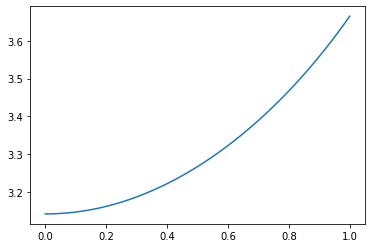

In [22]:
x_num = np.linspace(0,1,100)
y_num = 2
plt.plot(x_num, expr_f(x_num,y_num))
plt.show()

For multivariable expressions, can also substitute values in

In [23]:
F

x**2 + y*sin(z)

In [24]:
F.subs([(y,smp.cos(z)),(z,y)])

x**2 + sin(y)*cos(y)

In [25]:
F.subs([(x,2)])

y*sin(z) + 4

<a id='exam_1'></a>
# Examples

<a id='free_fall'></a>
### Free Fall

A falling object encounters a moving platform accelerating upwards:

1. Object $h_o(t) = h_0 - v_o t - \frac{1}{2}gt^2$
2. Platform $h_p(t) = v_p t + \frac{1}{2}qt^2$

**Find the initial velocity $v_0$ such that when the object and platform collide, they are moving at the same speed.**

We need to solve for $v_0$ and $t$ in the two equations

1. $h_0(t) = h_p(t)$
2. $ \frac{dh_0}{dt} (t) = - \frac{dh_p}{dt}(t) $

In sympy, need to construct our system of equations as $EQ_1=0$, $EQ_2=0$, ... In our case, we rewrite them as

1. $h_0(t) - h_p(t) = 0$
2. $\frac{dh_0}{dt} + \frac{dh_p}{dt} = 0$

In [26]:
t, h0, v0, g, vp, q = smp.symbols('t h_0 v_0 g v_p q', real=True, positive=True)

In [29]:
vp

v_p

Define expressions

In [30]:
h0t = h0 - v0*t - smp.Rational(1,2)*g*t**2
dh0dt = g*t - v0
hpt = vp*t + smp.Rational(1,2)*q*t**2
dhpdt = vp + q*t

In [31]:
h0t

-g*t**2/2 + h_0 - t*v_0

Define equations

In [32]:
eq1 = h0t - hpt
eq2 = dh0dt + dhpdt

In [33]:
eq1

-g*t**2/2 + h_0 - q*t**2/2 - t*v_0 - t*v_p

In [34]:
eq2

g*t + q*t - v_0 + v_p

Solve the equations

In [35]:
smp.solve([eq1, eq2], [t, v0])[0]

((-2*v_p/3 + sqrt(2)*sqrt(3*g*h_0 + 3*h_0*q + 2*v_p**2)/3)/(g + q),
 v_p/3 + sqrt(2)*sqrt(3*g*h_0 + 3*h_0*q + 2*v_p**2)/3)

In [36]:
t_collide, v_initfall = smp.solve([eq1, eq2], [t, v0])[0]

In [37]:
v_initfall

v_p/3 + sqrt(2)*sqrt(3*g*h_0 + 3*h_0*q + 2*v_p**2)/3

In [38]:
t_collide

(-2*v_p/3 + sqrt(2)*sqrt(3*g*h_0 + 3*h_0*q + 2*v_p**2)/3)/(g + q)

**What is the velocity when they collide?**

In [39]:
dh0dt.subs([(t,t_collide),(v0,v_initfall)]).simplify()

(-g*v_p - q*v_p/3 - q*sqrt(6*g*h_0 + 6*h_0*q + 4*v_p**2)/3)/(g + q)

In [40]:
dhpdt.subs([(t,t_collide),(v0,v_initfall)]).simplify()

(g*v_p + q*v_p/3 + q*sqrt(6*g*h_0 + 6*h_0*q + 4*v_p**2)/3)/(g + q)

<a id='calculus'></a>
# Calculus (1st year)

Watch my video here for a more in depth discussion: https://www.youtube.com/watch?v=-SdIZHPuW9o

In [3]:
x = smp.symbols('x')

<a id='Limits'></a>
## Limits

$$\lim_{x \to \pi} \sin(x/2+ \sin(x))$$

In [42]:
smp.limit(smp.sin(x/2 + smp.sin(x)), x, smp.pi)  # limit of sin(x/2 + sin(x)) as x approaches pi

1

$$ \lim_{x \to 0^+} \frac{2e^{1/x}}{e^{1/x}+1} $$

In [4]:
smp.limit(2*smp.exp(1/x) / (smp.exp(1/x)+1), x, 0, dir='+')

2

<a id='Derivatives'></a>
## Derivatives

$$ \frac{d}{dx} \left( \frac{1+\sin x}{1 - \cos x} \right)^2 $$

In [43]:
f_x = ((1 + smp.sin(x)) / (1 - smp.cos(x)))**2
f_x

(sin(x) + 1)**2/(1 - cos(x))**2

In [44]:
smp.diff(f_x, x)

2*(sin(x) + 1)*cos(x)/(1 - cos(x))**2 - 2*(sin(x) + 1)**2*sin(x)/(1 - cos(x))**3

$$\frac{d}{dx} f(x+g(x)) $$

In [48]:
f, g = smp.symbols('f g', cls=smp.Function)

In [49]:
f, g = smp.symbols('f g', cls=smp.Function)
g = g(x)
f = f(x+g)

In [50]:
f

f(x + g(x))

In [51]:
dfdx = smp.diff(f,x)
dfdx

(Derivative(g(x), x) + 1)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x + g(x))

In [52]:
dfdx.subs([(g, smp.sin(x))])

(Derivative(sin(x), x) + 1)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x + sin(x))

In [53]:
dfdx.subs([(g, smp.sin(x))]).doit() # need to call doit

(cos(x) + 1)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x + sin(x))

<a id='basic_integ'></a>
## Basic Integration

$$ \int \csc(x) \cot (x)  dx $$

In [54]:
smp.integrate(smp.csc(x)*smp.cot(x), x)

-1/sin(x)

$$ \int \sin(x) \cot (x)  dx $$

In [70]:
smp.integrate(smp.sin(x)*smp.cot(x), x)

sin(x)

### Initial Value Problems

1. Given $\frac{dy}{dx} = 8x + \csc^2(x)$ with $y(\pi/2) = -7$  solve for $y(x)$

In [ ]:
integral = smp.integrate(8*x + smp.csc(x)**2, x)

In [ ]:
C = - integral.subs(x, smp.pi/2) - 7
y = integral + C

In [ ]:
y.subs(x, smp.pi/2)

-7

In [ ]:
y

4*x**2 - pi**2 - 7 - cos(x)/sin(x)

<a id='definite'></a>
## Definite Integrals

$$\int_{0}^{\ln(4)}\frac{e^x dt}{\sqrt{e^{2x}+9}} $$

In [71]:
smp.integrate(smp.exp(x) / smp.sqrt(smp.exp(2*x) + 9), (x, 0, smp.log(4)))

-asinh(1/3) + asinh(4/3)

$$\int_1^t x^{10} e^x dx $$

In [72]:
t= smp.symbols('t')

In [73]:
smp.integrate(x**10*smp.exp(x), (x, 1, t))

(t**10 - 10*t**9 + 90*t**8 - 720*t**7 + 5040*t**6 - 30240*t**5 + 151200*t**4 - 604800*t**3 + 1814400*t**2 - 3628800*t + 3628800)*exp(t) - 1334961*E

$$ \int_{t}^{1} \frac{1}{x} * \log(\frac{1}{x^2})*\log(\frac{x^2}{t^2})   dx $$

In [108]:
x, t = smp.symbols('x t')
f = (1/x) * ((smp.log(1/x**2)) * (smp.log(x**2/t**2)))
f

log(x**(-2))*log(x**2/t**2)/x

In [109]:
smp.integrate(f, (x, 1, t))

-log(t**(-2))**3/12

<a id='multiple'></a>
## Multiple Integrals

In rare cases these can be done symbolically:

$$\int_0^1 \int_0^{1-x^2} \int_3^{4-x^2-y^2} xdzdydx$$

In [ ]:
x, y, z = smp.symbols('x, y, z')
f = x
smp.integrate(f, (z, 3, 4-x**2-y**2), (y, 0, 1-x**2), (x, 0, 1))

1/8

<a id='series'></a>
## Sequences and Series

In [6]:
n = smp.symbols('n')

$$ \sum_{n=0}^\infty \frac{6}{4^n} $$

In [7]:
smp.Sum(6/4**n, (n,0,smp.oo)).doit()

8

$$ \sum_{n=1}^{\infty} \frac{\tan^{-1}(n)}{n^{1.1}} $$

In [9]:
smp.Sum(smp.atan(n)/n**smp.Rational(11,10), (n,1,smp.oo)).n()  # n is for the approximation, sometimes series doesn't converges then it returns very bad approximation

15.3028821020457

<a id='exam_2'></a>
# Examples

The hydrogen wave function is given by

$$\psi_{nlm} = R_{nl}(r)Y_l^m(\theta, \phi) $$

$$R_{nl}(r) =  \sqrt{\left(\frac{2}{na}\right)^3 \frac{(n-l-1)!}{2n[(n+1)!]}} e^{-r/na} \left(\frac{2r}{na}\right)^l \left[L_{n-l-1}^{2l+1}(2r/na)\right]$$

The mean distance from the nucleus of the electron:

$$\left<r\right> = \int R_{nl}^2 r^3 dr$$

The standard deviation in the distance from the nucleus of the electron:

$$\sigma = \sqrt{\left<r^2\right> - \left<r\right>^2} =  \sqrt{\left(\int_{0}^{\infty}R_{nl}^2 r^4 dr\right) - \left(\int_{0}^{\infty} R_{nl}^2 r^3 dr\right)^2}$$

In [74]:
from sympy import assoc_laguerre

Define variables, be sure to specify their attributes

In [75]:
r, a = smp.symbols('r a', real=True, positive=True)
n, l = smp.symbols('n l', integer=True, positive=True)

Define $R_{nl}(r)$

In [80]:
R = smp.sqrt((2/(n*a))**3 * smp.factorial(n-l-1)/(2*n*(smp.factorial(n+l)))) \
     *smp.exp(-r/(n*a)) * (2*r/(n*a))**l * assoc_laguerre(n-l-1,2*l+1,(2*r/(n*a)))
R

2*(2*r/(a*n))**l*exp(-r/(a*n))*assoc_laguerre(-l + n - 1, 2*l + 1, 2*r/(a*n))*sqrt(factorial(-l + n - 1))/(a**(3/2)*n**2*sqrt(factorial(l + n)))

We can check to make sure this corresponds to the radial wavefunctions we expect. Lets see $R_{10}(r)$

In [81]:
R_10 = R.subs([(n,1),(l,0)])
R_10

2*exp(-r/a)/a**(3/2)

Function to compute $\int_{0}^{\infty} R_{nl}^2 r^k dr$ for particular values of $n$, $l$ and $k$

In [82]:
def compute_int(n_val, l_val, k):
    R_nl = R.subs([(n,n_val),(l,l_val)])
    return smp.integrate(R_nl**2 * r**k, (r,0,smp.oo))

Compute the mean radial distance of an electron in the state $\psi_{100}$

In [83]:
compute_int(n_val=3,l_val=1,k=3)

25*a/2

Compute the spread $\sigma$ in distances of the electron in state $\psi_{100}$

In [84]:
smp.sqrt(compute_int(n_val=1,l_val=0,k=4) - compute_int(n_val=1,l_val=0,k=3)**2)

sqrt(3)*a/2

Compute the mean radial distance of an electron in the state $\psi_{420}$

In [85]:
compute_int(n_val=4,l_val=2,k=3)

21*a

In [86]:
def compute_mean_distance(n_val, l_val=0):
    expr = compute_int(n_val,l_val,k=3)
    expr_f = smp.lambdify([a], expr)
    return expr_f(1)

In [87]:
ns = np.arange(1,10)
ds =[compute_mean_distance(ni) for ni in ns]

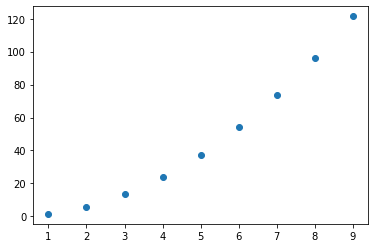

In [88]:
plt.scatter(ns, ds)

<a id='multivariable_calc'></a>
# Multivariable Calculus

In [11]:
x, y, z, u1, u2, u3, v1, v2, v3, t = smp.symbols('x y z u_1 u_2 u_3 v_1 v_2 v_3 t')

<a id='vect_geom'></a>
## Vectors and Geometry

In [12]:
a = np.array([1,2,3])
b = np.array([7,8,9])
u = smp.Matrix([u1,u2,u3])
v = smp.Matrix([v1,v2,v3])

<a id='add_mul'></a>
### Addition and multiplication

In [13]:
2*a+b

array([ 9, 12, 15])

In [14]:
2*u+v

Matrix([
[2*u_1 + v_1],
[2*u_2 + v_2],
[2*u_3 + v_3]])

Dot product

In [15]:
2*a+b

array([ 9, 12, 15])

In [16]:
u.dot(v)

u_1*v_1 + u_2*v_2 + u_3*v_3

Cross product

In [17]:
2*a+b

array([ 9, 12, 15])

In [18]:
u.cross(v)

Matrix([
[ u_2*v_3 - u_3*v_2],
[-u_1*v_3 + u_3*v_1],
[ u_1*v_2 - u_2*v_1]])

Norm

In [19]:
2*a+b

array([ 9, 12, 15])

In [20]:
u.norm()

sqrt(Abs(u_1)**2 + Abs(u_2)**2 + Abs(u_3)**2)

$\text{proj}_v(u) = \frac{u \cdot v}{|v|^2} v$

In [21]:
proj_b_a = np.dot(a,b)/np.linalg.norm(b)**2 * b
proj_b_a

array([1.80412371, 2.06185567, 2.31958763])

In [22]:
proj_v_u = u.dot(v)/v.norm()**2 * v
proj_v_u

Matrix([
[v_1*(u_1*v_1 + u_2*v_2 + u_3*v_3)/(Abs(v_1)**2 + Abs(v_2)**2 + Abs(v_3)**2)],
[v_2*(u_1*v_1 + u_2*v_2 + u_3*v_3)/(Abs(v_1)**2 + Abs(v_2)**2 + Abs(v_3)**2)],
[v_3*(u_1*v_1 + u_2*v_2 + u_3*v_3)/(Abs(v_1)**2 + Abs(v_2)**2 + Abs(v_3)**2)]])

Lines: $\vec{r}(t) = \vec{r}_0 + t\vec{v}$

In [9]:
r0 = smp.Matrix([1,1,1])
v = smp.Matrix([1,3,-1])
r = r0 + t*v
r

Matrix([
[  t + 1],
[3*t + 1],
[  1 - t]])

Planes: $\vec{n} \cdot (P_0-\left<x,y,z\right>) = 0$

In [10]:
P0 = smp.Matrix([4,4,8])
r = smp.Matrix([x,y,z])
n = smp.Matrix([1,1,1])
n.dot(P0-r)

-x - y - z + 16

<a id='vect_calc'></a>
## Vector Calculus

<a id='vect_der'></a>
### Vector Derivatives

In [11]:
r = smp.Matrix([3*t, smp.sin(t), t**2])
r

Matrix([
[   3*t],
[sin(t)],
[  t**2]])

In [12]:
smp.diff(r,t)

Matrix([
[     3],
[cos(t)],
[   2*t]])

**Example:** Find the angle between the velocity and acceleration as a function of time $\theta(t)$

In [13]:
v = smp.diff(r,t)
a = smp.diff(v,t)
theta = smp.acos(v.dot(a)/(v.norm()*a.norm())).simplify()
theta

acos((4*t - sin(2*t)/2)/(sqrt(Abs(sin(t))**2 + 4)*sqrt(4*Abs(t)**2 + Abs(cos(t))**2 + 9)))

Find theta at $t=6$

In [16]:
theta.subs(t,6)

acos((24 - sin(12)/2)/(sqrt(sin(6)**2 + 4)*sqrt(cos(6)**2 + 153)))

In [18]:
theta.subs(t,6).evalf()

0.251108015692338

<a id='vect_int'></a>
### Vector Integrals

(Note: Will not add the +C)

In [19]:
r = smp.Matrix([smp.exp(t)*smp.cos(t), t**4, 1/(1+t**2)])
r

Matrix([
[exp(t)*cos(t)],
[         t**4],
[ 1/(t**2 + 1)]])

In [20]:
smp.Integral(r,t).doit()

Matrix([
[exp(t)*sin(t)/2 + exp(t)*cos(t)/2],
[                           t**5/5],
[                          atan(t)]])

Some cases integrals can't be solved analytically - > see Second Year in Calculus video

In [23]:
r = smp.Matrix([smp.exp(t**2)*smp.cos(t)**3, smp.exp(-t**4), 1/(3+t**2)])
r

Matrix([
[exp(t**2)*cos(t)**3],
[         exp(-t**4)],
[       1/(t**2 + 3)]])

In [26]:
smp.integrate(r, (t,0,1)).n()

Matrix([
[0.815496711718266],
[0.844838594757102],
[0.302299894039036]])

In [ ]:
from scipy.integrate import quad_vec

In [26]:
r_f = smp.lambdify([t], r)

In [27]:
from scipy.integrate import quad_vec
r = smp.Matrix([smp.exp(t**2)*smp.cos(t)**3, smp.exp(-t**4), 1/(3+t**2)])
r_f = smp.lambdify([t], r)
quad_vec(r_f, 0, 1)[0]

array([[0.81549671],
       [0.84483859],
       [0.30229989]])

<a id='arc_len'></a>
### Arclength

$$L = \int_a^b \sqrt{dx^2 + dy^2 + dz^2} = \int_a^b \sqrt{(dx/dt)^2 + (dy/dt)^2 + (dz/dt)^2 } dt $$

Rare Cases can be done symbolically. Find arclength of $\left< 0, t, t^2 \right>$ from $t=0$ to $t=1$

In [134]:
r = smp.Matrix([0, t, t**2])
r

Matrix([
[   0],
[   t],
[t**2]])

In [137]:
r = smp.Matrix([0, t, t**2])
smp.integrate(smp.diff(r,t).norm(), (t,0,1))

asinh(2)/4 + sqrt(5)/2

<a id='exam_3'></a>
# Examples

The magnetic field at a point $\vec{r}$ of a current configuration is 

$$\vec{B}(\vec{r}) = \frac{\mu_0}{4\pi}\int_t \frac{I \frac{d\vec{\ell}}{dt} \times (\vec{r}-\vec{\ell})}{|\vec{r}-\vec{\ell}|^3} dt $$

where $\vec{r} = (x,y,z)$ and $\vec{l} = (f(t), g(t), h(t))$ is a 1D curve in space that gives the location of the wire.

**Part 1: Use Sympy to find the integrand as a single 3-vector**

In [188]:
x, y, z, t, I, mu0 = smp.symbols('x y z t I \mu_0', real=True)
f, g, h = smp.symbols('f g h', cls=smp.Function)
f=f(t)
g=g(t)
h=h(t)

Define $\vec{r}$, $\vec{\ell}$ and $\vec{d\ell/dt}$

In [189]:
r = smp.Matrix([x,y,z])
l = smp.Matrix([f,g,h])
dldt = smp.diff(l)

Define integrand

In [190]:
dBdt = I * dldt.cross(r-l) / (r-l).norm()**3

In [191]:
dBdt

Matrix([
[I*(-(y - g(t))*Derivative(h(t), t) + (z - h(t))*Derivative(g(t), t))/(Abs(x - f(t))**2 + Abs(y - g(t))**2 + Abs(z - h(t))**2)**(3/2)],
[ I*((x - f(t))*Derivative(h(t), t) - (z - h(t))*Derivative(f(t), t))/(Abs(x - f(t))**2 + Abs(y - g(t))**2 + Abs(z - h(t))**2)**(3/2)],
[I*(-(x - f(t))*Derivative(g(t), t) + (y - g(t))*Derivative(f(t), t))/(Abs(x - f(t))**2 + Abs(y - g(t))**2 + Abs(z - h(t))**2)**(3/2)]])

**Part 2**: Find the magnetic field a distance $H$ above a ring of radius $R$ flowing clockwise

In [192]:
R, H = smp.symbols('R, H', real=True)

In [193]:
dBdt = dBdt.subs([(f, R*smp.cos(t)),
                  (g, R*smp.sin(t)),
                  (h, 0),
                  (x,0), (y,0), (z,H)]).doit()
dBdt.simplify()
dBdt

Matrix([
[H*I*R*cos(t)/(H**2 + R**2)**(3/2)],
[H*I*R*sin(t)/(H**2 + R**2)**(3/2)],
[      I*R**2/(H**2 + R**2)**(3/2)]])

Find magnetic field

In [194]:
mu0/(4*smp.pi) * smp.integrate(dBdt, [t,0,2*smp.pi])

Matrix([
[                                    0],
[                                    0],
[I*R**2*\mu_0/(2*(H**2 + R**2)**(3/2))]])

For more ccomplicated electrical wire configurations, see my video on solving for the magnetic field of an arbtriary wire (uses numerical integration)

<a id='partial_der'></a>
# Partial/Directional Derivatives

In [156]:
x, y, z = smp.symbols('x y z')

<a id='basic_partial'></a>
### Basics

Partial Derivatives $\partial f / \partial x$ and $\partial f / \partial y$ of $f(x,y)=y^2\sin(x+y)$

In [157]:
f = y**2 * smp.sin(x+y)
smp.diff(f,x)

y**2*cos(x + y)

In [158]:
smp.diff(f,y)

y**2*cos(x + y) + 2*y*sin(x + y)

Or more complicated things like $\frac{\partial^3 f}{\partial xy^2}$

In [159]:
smp.diff(f,y,y,x)

-y**2*cos(x + y) - 4*y*sin(x + y) + 2*cos(x + y)

<a id='chain_partial'></a>
### The Chain Rule

In [160]:
t = smp.symbols('t')
x, y, z, w, v =smp.symbols('x, y, z w v', cls=smp.Function)

* Suppose $x$, $y$, and $z$ are functions of $t$ 
* $w$ is a function of $x$, $y$, and $z$. i.e $w=w(x,y,z)$

Find $dw/dt$

In [161]:
x = x(t)
y = y(t)
z = z(t)
w = w(x, y, z)

In [162]:
w

w(x(t), y(t), z(t))

Can keep things in a more functional form:

In [163]:
smp.diff(w,t)

Derivative(w(x(t), y(t), z(t)), x(t))*Derivative(x(t), t) + Derivative(w(x(t), y(t), z(t)), y(t))*Derivative(y(t), t) + Derivative(w(x(t), y(t), z(t)), z(t))*Derivative(z(t), t)

Or put in specific functions:

In [164]:
w1 = x**2+smp.exp(y)*smp.sin(z)

In [167]:
smp.diff(w1,t)

2*x(t)*Derivative(x(t), t) + exp(y(t))*sin(z(t))*Derivative(y(t), t) + exp(y(t))*cos(z(t))*Derivative(z(t), t)

In [168]:
w1 = x**2+smp.exp(y)*smp.sin(z)
smp.diff(w1,t).subs([(x, smp.sin(t)),
                    (y, smp.cos(t)),
                    (z, t**2)]).doit()

2*t*exp(cos(t))*cos(t**2) - exp(cos(t))*sin(t)*sin(t**2) + 2*sin(t)*cos(t)

<a id='int_vect_field'></a>
# Integrals and Vector Fields

<a id='line_scalar'></a>
## Line Integrals (Scalar)

Given $\vec{r}(t) = \left< g(t), h(t), k(t) \right>$ the line integral of $f(x,y,z)$ along the curve is

$$\int_C f(x,y,z) ds = \int_a^b f(g(t), h(t), k(t))|d\vec{r}/dt|dt$$

In [ ]:
t = smp.symbols('t', real=True)
x, y, z, f = smp.symbols('x y z f', cls=smp.Function, real=True)
x = x(t)
y = y(t)
z = z(t)
r = smp.Matrix([x, y, z])
f = f(x,y,z)

In [ ]:
integrand = f*smp.diff(r,t).norm()
integrand

sqrt(Abs(Derivative(x(t), t))**2 + Abs(Derivative(y(t), t))**2 + Abs(Derivative(z(t), t))**2)*f(x(t), y(t), z(t))

Suppose 
* $\vec{r}(t) = \left<\cos(t), \sin(t), t \right>$ 
* $f(x,y,z)=2xy+\sqrt{z}$ 

and we are going from $t=0$ to $t=2\pi$. In this case it can be solved symbolically:

In [ ]:
integrand1 = integrand.subs([(f, 2*x*y+smp.sqrt(z)),
                            (x, smp.cos(t)),
                            (y, smp.sin(t)),
                            (z, t)]).doit().simplify()
smp.integrate(integrand1, (t, 0, 2*smp.pi))

sqrt(2)/2 + sqrt(2)*(-1/2 + 4*sqrt(2)*pi**(3/2)/3)

In general, can't be done symbolically. Consider now

* $\vec{r}(t) = \left<3\cos(t), 2\sin(t), e^{t/4} \right>$ 
* $f(x,y,z)=2xy+\sqrt{z}$ 

and we are going from $t=0$ to $t=2\pi$.

In [ ]:
integrand2 = integrand.subs([(f, 2*x*y+smp.sqrt(z)),
                            (x, 3*smp.cos(t)),
                            (y, smp.sin(t)),
                            (z, smp.exp(t/4))]).doit().simplify()
# Won't Run!
#smp.integrate(integrand2, (t, 0, 2*smp.pi))

In [ ]:
integrand2

(exp(t/8) + 3*sin(2*t))*sqrt(exp(t/2) + 128*sin(t)**2 + 16)/4

Do it numerically using scipy's `quad` function

In [ ]:
integrand2_num = smp.lambdify([t], integrand2)
quad(integrand2_num, 0, 2*np.pi)[0]

21.05530045675979

<a id='line_vector'></a>
## Line Integrals (Vector)

Given $\vec{r}(t) = \left< g(t), h(t), k(t) \right>$ the line integral of $\vec{F}(x,y,z)$ along the curve is

$$\int_C \vec{F}(x,y,z) \cdot d\vec{r} = \int_a^b\vec{F}(g(t), h(t), k(t)) \cdot \frac{d\vec{r}}{dt} dt$$

In [ ]:
t = smp.symbols('t', real=True)
x, y, z, F1, F2, F3 = smp.symbols('x y z F_1, F_2, F_3', cls=smp.Function, real=True)
x = x(t)
y = y(t)
z = z(t)
F1 = F1(x,y,z)
F2 = F2(x,y,z)
F3 = F3(x,y,z)
r = smp.Matrix([x, y, z])
F = smp.Matrix([F1, F2, F3])

In [ ]:
integrand = F.dot(smp.diff(r,t))
integrand

F_1(x(t), y(t), z(t))*Derivative(x(t), t) + F_2(x(t), y(t), z(t))*Derivative(y(t), t) + F_3(x(t), y(t), z(t))*Derivative(z(t), t)

Suppose $\vec{F} = \left< \sqrt{z}, -2x, \sqrt{y}\right>$ and $\vec{r}(t) = \left<t, t^2, t^4 \right>$ from $t=0$ to $t=1$

In [ ]:
integrand1 = integrand.subs([(F1, smp.sqrt(z)),
                             (F2, -2*x),
                             (F3, smp.sqrt(y)),
                             (x, t),
                             (y, t**2),
                             (z, t**4)]).doit().simplify()
smp.integrate(integrand1, (t, 0, 1))

-1/5

Often times this can't be done by hand, and one needs to evaluate numerically using scipy:

Suppose $\vec{F} = \left< \sqrt{|z|}, -2x, \sqrt{|y|}\right>$ and $\vec{r}(t) = \left<3\cos^2(t), t^2, 2\sin(t) \right>$ from $t=0$ to $t=2\pi$

In [ ]:
integrand2 = integrand.subs([(F1, smp.sqrt(smp.Abs(z))),
                             (F2, -2*x),
                             (F3, smp.sqrt(smp.Abs(y))),
                             (x, 3*smp.cos(t)**2),
                             (y, t**2),
                             (z, 2*smp.sin(t))]).doit().simplify()
# Won't Run
#smp.integrate(integrand2, (t, 0, 2*smp.pi))

In [ ]:
integrand2

2*(-6*t*cos(t) - 3*sqrt(2)*sin(t)*sqrt(Abs(sin(t))) + Abs(t))*cos(t)

Do it numerically using scipy's `quad` function

In [ ]:
integrand2_num = smp.lambdify([t], integrand2)
quad(integrand2_num, 0, 2*np.pi)[0]

-118.4352528130723

<a id='surface_scalar'></a>
## Surface Integrals (Scalar)

Area of a surface parameterized by $\vec{r}(u,v)$ is given by 

$$A = \iint_S \left| \frac{d\vec{r}}{du} \times \frac{d\vec{r}}{dv} \right| du dv$$

The surface integral of a scalar function $G(\vec{r})$ is given by

$$\iint_S G(\vec{r}(u,v)) \left| \frac{d\vec{r}}{du} \times \frac{d\vec{r}}{dv} \right| du dv$$

2D parabola: $\vec{r}(x,y) = \left<x, y, x^2+y^2 \right>$ and thus $\vec{r}(\rho, \theta) = \left<\rho\cos\theta, \rho\sin\theta, \rho^2\right>$. Suppose the surface density is given by $G(x,y,z)=x^2+y^2$. Find surface integral for $0<\rho<1$ and $0<\theta<2\pi$

In [ ]:
rho, the = smp.symbols(r'\rho \theta',pos=True, real=True)
x, y, z, G = smp.symbols('x y z G', cls=smp.Function, real=True)
x = x(rho, the)
y = y(rho, the)
z = z(rho, the)
G = G(x,y,z)
r = smp.Matrix([x, y, z])

In [ ]:
integrand = G*smp.diff(r,rho).cross(smp.diff(r,the)).norm()
integrand

sqrt(Abs(Derivative(x(\rho, \theta), \rho)*Derivative(y(\rho, \theta), \theta) - Derivative(x(\rho, \theta), \theta)*Derivative(y(\rho, \theta), \rho))**2 + Abs(Derivative(x(\rho, \theta), \rho)*Derivative(z(\rho, \theta), \theta) - Derivative(x(\rho, \theta), \theta)*Derivative(z(\rho, \theta), \rho))**2 + Abs(Derivative(y(\rho, \theta), \rho)*Derivative(z(\rho, \theta), \theta) - Derivative(y(\rho, \theta), \theta)*Derivative(z(\rho, \theta), \rho))**2)*G(x(\rho, \theta), y(\rho, \theta), z(\rho, \theta))

In [ ]:
integrand1 = integrand.subs([(G, x**2+y**2),
                             (x, rho*smp.cos(the)),
                             (y, rho*smp.sin(the)),
                             (z, rho**2)]).doit().simplify()
integrand1

\rho**2*sqrt(4*\rho**2 + 1)*Abs(\rho)

In [ ]:
smp.integrate(integrand1, (the, 0, 2*smp.pi), (rho, 0, 1))

pi/60 + 5*sqrt(5)*pi/12

As before, if this integral can't be done symbolically, need to use scipy to convert to numerical function.

<a id='surface_vector'></a>
## Surface Integrals (Vector)

The surface integral of a vector function $\vec{G}(\vec{r})$ is given by

$$\iint_S \vec{G}(\vec{r}(u,v)) \cdot \left(\frac{d\vec{r}}{du} \times \frac{d\vec{r}}{dv}\right) du dv$$

This is also know as the flux of the vector field $\vec{G}$ through the surface

2D parabola: $\vec{r}(x,y) = \left<x, y, x^2+y^2 \right>$ and thus $\vec{r}(\rho, \theta) = \left<\rho\cos\theta, \rho\sin\theta, \rho^2\right>$. Suppose a vector field is given by $\vec{G}(x,y,z)=\left<y^2, z, 0 \right>$. Find the flux of $\vec{G}$ through half the surface for $0<\rho<1$ and $0<\theta<\pi$

In [ ]:
rho, the = smp.symbols(r'\rho \theta',pos=True, real=True)
x, y, z, G1, G2, G3 = smp.symbols('x y z G_1, G_2, G_3', cls=smp.Function, real=True)
x = x(rho, the)
y = y(rho, the)
z = z(rho, the)
G1 = G1(x,y,z)
G2 = G2(x,y,z)
G3 = G3(x,y,z)
r = smp.Matrix([x, y, z])
G = smp.Matrix([G1, G2, G3])

In [ ]:
integrand = G.dot(smp.diff(r,rho).cross(smp.diff(r,the)))
integrand

(Derivative(x(\rho, \theta), \rho)*Derivative(y(\rho, \theta), \theta) - Derivative(x(\rho, \theta), \theta)*Derivative(y(\rho, \theta), \rho))*G_3(x(\rho, \theta), y(\rho, \theta), z(\rho, \theta)) + (-Derivative(x(\rho, \theta), \rho)*Derivative(z(\rho, \theta), \theta) + Derivative(x(\rho, \theta), \theta)*Derivative(z(\rho, \theta), \rho))*G_2(x(\rho, \theta), y(\rho, \theta), z(\rho, \theta)) + (Derivative(y(\rho, \theta), \rho)*Derivative(z(\rho, \theta), \theta) - Derivative(y(\rho, \theta), \theta)*Derivative(z(\rho, \theta), \rho))*G_1(x(\rho, \theta), y(\rho, \theta), z(\rho, \theta))

In [ ]:
integrand1 = integrand.subs([(G1, y**2),
                             (G2, z),
                             (G3, 0),
                             (x, rho*smp.cos(the)),
                             (y, rho*smp.sin(the)),
                             (z, rho**2)]).doit().simplify()
integrand1

-2*\rho**4*(sin(2*\theta)/2 + 1)*sin(\theta)

In [ ]:
smp.integrate(integrand1, (the, 0, smp.pi), (rho, 0, 1))

-4/5

Again, if this could not be done symbolically, one would need to convert the integrand into a numpy function and integrate using scipys `quad` function, like in previous examples.